DataSet : https://networkrepository.com/fb-pages-food.php  
Explanation : https://www.analyticsvidhya.com/blog/2020/01/link-prediction-how-to-predict-your-future-connections-on-facebook/


In [4]:
import pandas as pd
import numpy as np
import random
import networkx as nx
from tqdm import tqdm
import re
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [5]:
# load nodes details
with open("fb-pages-food.nodes") as f:
    fb_nodes = f.read().splitlines() 

# load edges (or links)
with open("voxel2image.edges") as f:
    fb_links = f.read().splitlines() 

len(fb_nodes), len(fb_links)

(621, 43488)

In [6]:
df_fb_nodes=pd.DataFrame(fb_nodes)
df_fb_nodes

,0
0,"id,name,new_id"
1,"402449106435352,Josh Marks,386"
2,"368969274888,Blue Ribbon Restaurants,473"
3,"765596333518863,Pat Neely,1"
4,"136870209668885,La Griglia,542"
...,...
616,"305811056194084,Jumia Food,163"
617,"106556872725754,Luke Thomas,381"
618,"244033175685576,Clodagh McKenna,140"
619,"119127748110871,Chef Michelle Bernstein,157"


In [7]:
# captture nodes in 2 separate lists
node_list_1 = []
node_list_2 = []

for i in tqdm(fb_links):
  node_list_1.append(i.split(',')[0])
  node_list_2.append(i.split(',')[1])

fb_df = pd.DataFrame({'node_1': node_list_1, 'node_2': node_list_2})

100%|██████████| 43488/43488 [00:00<00:00, 978304.25it/s]



해당 데이터셋은 페이스북의 연결된 소셜네트워크를 보여주고 있습니다. 
아래 보이시는 각 노드에 연결된 노드 번호를 보여줍니다.
현재 0번 노드는 276, 58, 132, 603, 398, 555번호의 노드와 연결된것을 알려주고 있습니다.

In [8]:
fb_df

,node_1,node_2
0,1,558
1,1,546
2,1,1831
3,1,535
4,1,1479
...,...,...
43483,895,2562
43484,895,2565
43485,895,2561
43486,895,2570


In [9]:
# captture nodes in 2 separate lists
node_list_1 = []
node_list_2 = []

for i in tqdm(fb_links):
  node_list_1.append(i.split(',')[0])
  node_list_2.append(i.split(',')[1])

fb_df = pd.DataFrame({'node_1': node_list_1, 'node_2': node_list_2})

100%|██████████| 43488/43488 [00:00<00:00, 1078841.51it/s]


해당 노드의 에지를 통해서 비쥬얼라이제이션을 수행하면 다음과 같습니다.

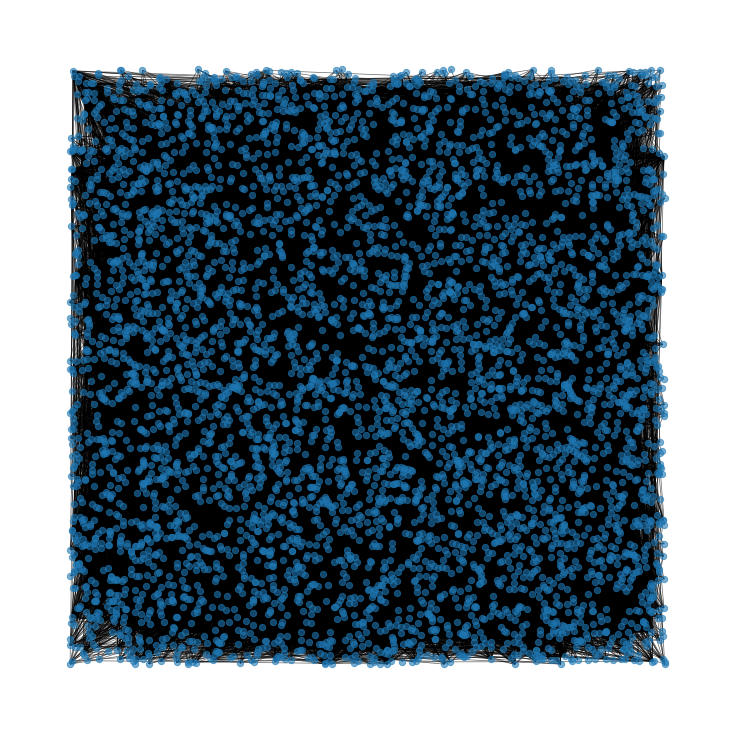

In [10]:
# create graph
G = nx.from_pandas_edgelist(fb_df, "node_1", "node_2", create_using=nx.Graph())

# plot graph
plt.figure(figsize=(10,10))

pos = nx.random_layout(G, seed=23)
nx.draw(G, with_labels=False,  pos = pos, node_size = 40, alpha = 0.6, width = 0.7)

plt.show()

In [11]:
# combine all nodes in a list
node_list = node_list_1 + node_list_2

# remove duplicate items from the list
node_list = list(dict.fromkeys(node_list))

# build adjacency matrix
adj_G = nx.to_numpy_matrix(G, nodelist = node_list)

In [12]:
df_node_list=pd.DataFrame(node_list)
df_node_list


,0
0,1
1,2
2,3
3,4
4,5
...,...
5186,2091
5187,2061
5188,2092
5189,2093


In [13]:
df_adj_G=pd.DataFrame(adj_G)
df_adj_G


,0,1,2,3,4,5,6,7,8,9,...,5181,5182,5183,5184,5185,5186,5187,5188,5189,5190
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5186,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5187,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5188,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5189,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
# get unconnected node-pairs
all_unconnected_pairs = []

# traverse adjacency matrix
offset = 0
for i in tqdm(range(adj_G.shape[0])):
  for j in range(offset,adj_G.shape[1]):
    if i != j:
      if nx.shortest_path_length(G, str(i), str(j)) <=2:
        if adj_G[i,j] == 0:
          all_unconnected_pairs.append([node_list[i],node_list[j]])

  offset = offset + 1

  0%|          | 0/5191 [00:00<?, ?it/s]


NodeNotFound: Either source 0 or target 1 is not in G

In [15]:
len(all_unconnected_pairs)

0

In [16]:

df_all_unconnected_pairs=pd.DataFrame(all_unconnected_pairs)
df_all_unconnected_pairs

""


In [17]:
node_1_unlinked = [i[0] for i in all_unconnected_pairs]
node_2_unlinked = [i[1] for i in all_unconnected_pairs]

data = pd.DataFrame({'node_1':node_1_unlinked, 
                     'node_2':node_2_unlinked})

# add target variable 'link'
data['link'] = 0

In [18]:
initial_node_count = len(G.nodes)

fb_df_temp = fb_df.copy()

# empty list to store removable links
omissible_links_index = []

for i in tqdm(fb_df.index.values):
  
  # remove a node pair and build a new graph
  G_temp = nx.from_pandas_edgelist(fb_df_temp.drop(index = i), "node_1", "node_2", create_using=nx.Graph())
  
  # check there is no spliting of graph and number of nodes is same
  if (nx.number_connected_components(G_temp) == 1) and (len(G_temp.nodes) == initial_node_count):
    omissible_links_index.append(i)
    fb_df_temp = fb_df_temp.drop(index = i)

 25%|██▌       | 11037/43488 [12:55<37:59, 14.23it/s] 


KeyboardInterrupt: 

In [126]:
len(omissible_links_index)

1483

In [127]:
# create dataframe of removable edges
fb_df_ghost = fb_df.loc[omissible_links_index]

# add the target variable 'link'
fb_df_ghost['link'] = 1

data = data.append(fb_df_ghost[['node_1', 'node_2', 'link']], ignore_index=True)

총 연결되지 않은 데이터는 19018개이구요 연결된 에지는 2966입니다.

In [128]:
data['link'].value_counts()

0    19018
1     1483
Name: link, dtype: int64

In [173]:
# drop removable edges
fb_df_partial = fb_df.drop(index=fb_df_ghost.index.values)

# build graph
G_data = nx.from_pandas_edgelist(fb_df_partial, "node_1", "node_2", create_using=nx.Graph())

각각의 노드에 노드2벡터를 하준뒤 디멘션을 100주면 100차원의 벡터를 갖는 피쳐를 생성해줍니다.
원래 기존의 노트 피쳐는 id,name,new_id의 세개의 데이터로 구성이 되어 있습니다.

예를 들어 아래와 같습니다. 아이디, 이름 그리고 뉴 아이디 입니다.
여기서 new id는 에지와 연결될 때 쓰이는 노드 번호가 되겠습니다.
402449106435352,Josh Marks,386
368969274888,Blue Ribbon Restaurants,473
765596333518863,Pat Neely,1

In [130]:
from node2vec import Node2Vec

# Generate walks
node2vec = Node2Vec(G_data, dimensions=100, walk_length=16, num_walks=50)

# train node2vec model
n2w_model = node2vec.fit(window=7, min_count=1)

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:13<00:00,  3.63it/s]


In [174]:
fb_df_partial

,node_1,node_2
5,0,555
7,1,611
10,2,345
20,3,228
24,557,151
...,...,...
2096,597,603
2097,597,611
2099,601,616
2100,603,616


TypeError: 'Word2Vec' object is not subscriptable :   
https://stackoverflow.com/questions/67922777/ploting-function-word2vec-error-word2vec-object-is-not-subscriptable  
model[str(i)]했더니 에러가나서 model.wv[str(i)] 했더니 됐다.

In [131]:
x = [(n2w_model.wv[str(i)]+n2w_model.wv[str(j)]) for i,j in zip(data['node_1'], data['node_2'])]

In [132]:
xtrain, xtest, ytrain, ytest = train_test_split(np.array(x), data['link'], 
                                                test_size = 0.3, 
                                                random_state = 35)

In [133]:
data['link']

0        0
1        0
2        0
3        0
4        0
        ..
20496    1
20497    1
20498    1
20499    1
20500    1
Name: link, Length: 20501, dtype: int64

In [134]:
lr = LogisticRegression(class_weight="balanced")

lr.fit(xtrain, ytrain)

/home/kangjunekoo/anaconda3/envs/pytorch/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(class_weight='balanced')

In [135]:
predictions = lr.predict_proba(xtest)

binary cross entropy로해서 테스트 데이터셋에서 총 6150개가 있다.
연결됐으면 1인덱스에, 연결안됐으면 0인덱스에 연결을 해놓는다.  
이때 각각 0과 1 인덱스의 확률을 나타낸다.
여기서 스레시홀드값을 지정해야할듯하다
한쪽이 0.8이상이면 그것은 거의 정확히 예측했다고 봐도 되지만 
0.6 이나 0.5정도는 거의 예측을 못했기 떄문에 그냥 무시하는게 좋을 듯하다.

In [136]:
df_predictions=pd.DataFrame(predictions)
df_predictions.T


,0,1,2,3,4,5,6,7,8,9,...,6141,6142,6143,6144,6145,6146,6147,6148,6149,6150
0,0.094039,0.241186,0.676183,0.855238,0.006012,0.256101,0.724333,0.901072,0.725805,0.757014,...,0.790286,0.688763,0.647428,0.209969,0.716158,0.789394,0.732996,0.988675,0.8056,0.700598
1,0.905961,0.758814,0.323817,0.144762,0.993988,0.743899,0.275667,0.098928,0.274195,0.242986,...,0.209714,0.311237,0.352572,0.790031,0.283842,0.210606,0.267004,0.011325,0.1944,0.299402


In [137]:
predictionsX = lr.predict_proba(xtrain)
df_predictionsX=pd.DataFrame(predictionsX)
df_predictionsX

,0,1
0,0.740106,0.259894
1,0.818470,0.181530
2,0.493250,0.506750
3,0.942802,0.057198
4,0.750837,0.249163
...,...,...
14345,0.060376,0.939624
14346,0.882262,0.117738
14347,0.422274,0.577726
14348,0.640020,0.359980


In [138]:
df_ytrain=pd.DataFrame(ytrain)
df_ytrain

,link
14302,0
3179,0
449,0
5279,0
8418,0
...,...
19391,1
15393,0
9143,0
17679,0


In [139]:
roc_auc_score(ytrain, predictionsX[:,1])

0.8431216985207332

In [140]:
roc_auc_score(ytest, predictions[:,1])

0.812640890757069

In [141]:
predictions[0,1]

0.9059613848779143

In [164]:
df_datalink=pd.DataFrame(data['link'])
df_datalink.T

,0,1,2,3,4,5,6,7,8,9,...,20491,20492,20493,20494,20495,20496,20497,20498,20499,20500
link,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


In [165]:
df_xtrain=pd.DataFrame(xtrain)
df_xtrain

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.857178,-0.052322,-0.643748,0.343279,-0.126928,-0.284210,-0.728599,1.231109,-0.327590,-1.253935,...,-0.026313,0.019284,-0.027888,0.085385,1.139228,1.378757,0.600284,-0.713182,-0.227047,-0.525850
1,-0.053778,-0.183292,-1.001397,0.219027,-0.227577,-0.842043,0.268751,0.451272,-0.106170,-0.288246,...,0.988287,-0.419085,0.481831,1.179093,0.967216,0.530194,0.577181,-0.576412,0.288716,0.079030
2,-0.282782,-0.494978,-0.598237,-0.420715,-0.123197,-0.849011,-0.414629,1.716782,0.241593,-1.227647,...,0.835473,0.544580,0.218027,0.688446,0.646709,1.401837,-0.644373,-0.744461,-0.083925,-0.140918
3,0.795037,0.052218,0.141096,-0.274270,-0.097817,-0.597753,-0.400412,-0.519106,0.185410,0.250816,...,0.427365,-0.067747,-0.797406,0.511544,0.368106,0.275638,-0.316283,-0.591162,0.392748,-0.919168
4,0.309220,0.205965,-0.201951,-0.344482,-1.319938,-0.256964,-0.100718,0.385119,-0.255692,1.185173,...,0.346798,-0.097017,0.455595,-0.606086,1.370754,0.293333,-0.259434,-0.710153,0.458887,-1.175206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14345,0.019955,-0.328665,-0.515215,0.632202,-0.883069,-0.161999,-0.126936,1.326000,-0.481718,-0.411826,...,0.340271,0.439838,0.156088,0.909406,1.604485,1.035532,0.380785,-0.302540,0.271519,-0.145927
14346,0.485949,-0.091105,0.033657,-0.521105,0.261022,-0.812687,-0.346348,0.384181,0.239771,-0.543784,...,0.064123,0.165401,-0.485905,0.685718,0.635832,0.590428,-0.055173,-1.043893,0.647947,-1.114556
14347,-0.669719,-0.491941,-0.621340,0.101423,-0.187073,-0.962353,-0.083428,0.328588,0.210667,-1.076440,...,0.447303,-0.059614,-0.450407,0.315909,1.078460,0.117492,0.480438,-0.365644,0.235275,-0.285174
14348,0.103555,-0.008296,0.109879,-0.032061,-0.486207,-0.444008,-0.360199,0.863470,0.089954,-0.442635,...,0.399858,-0.055464,-0.571354,-0.362295,0.997860,1.237182,0.897253,-0.897963,-0.174158,-0.429902


global descriptor = feature vectror

In [20]:
df_xtrain=pd.read_csv('desc_df')
df_xtrain

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0.011980,0.021420,0.004720,0.000358,0.003450,0.005856,-0.007780,-0.024250,-0.037080,0.007870,...,-0.000026,-0.004850,-0.002092,-0.006752,-0.019740,-0.007133,-0.016740,0.014690,0.002031,0.012764
1,0.026470,-0.005310,0.001088,0.002005,-0.004017,0.011250,-0.003805,-0.007397,-0.023400,0.020460,...,0.037480,0.041750,0.003252,-0.016420,-0.022220,0.004494,0.022830,0.015470,-0.004720,-0.002730
2,0.004837,-0.000947,0.002539,0.033970,0.000978,0.002398,-0.002146,-0.014860,0.007378,0.038940,...,0.029050,0.028690,-0.008500,-0.011040,0.001041,-0.007060,-0.015230,-0.011955,-0.009490,0.011710
3,0.014870,0.007656,0.015274,-0.004726,0.005260,0.024370,0.015250,-0.000037,0.000007,0.012470,...,-0.001531,0.022890,-0.020610,-0.018070,-0.017900,0.017670,0.007250,-0.018650,0.007250,0.008224
4,0.014656,-0.030380,0.002981,-0.014244,0.019330,0.022430,0.010100,-0.004684,-0.007565,0.011000,...,0.017840,-0.007835,0.027480,0.008286,0.018550,-0.044070,0.006840,0.022600,-0.008000,-0.008300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4474,-0.000225,0.026120,-0.007270,0.005623,-0.017330,-0.006256,-0.004467,-0.034200,-0.015564,0.015240,...,0.018680,0.007053,-0.015730,-0.001863,-0.001037,0.007057,0.013950,-0.000413,-0.026600,-0.016600
4475,-0.002110,0.003824,0.005886,0.021620,-0.007965,-0.018400,-0.002628,-0.028210,-0.023700,0.032260,...,0.002155,0.016130,-0.002287,-0.021090,0.004227,-0.001347,-0.015640,-0.027910,-0.007310,0.012620
4476,0.019740,0.001868,0.001817,0.002869,-0.025650,0.010440,0.001712,-0.029330,-0.041320,0.002012,...,-0.006363,-0.038570,-0.001316,0.004190,-0.016460,0.014786,-0.005910,-0.007880,0.013260,-0.007492
4477,0.010605,0.005154,0.018370,0.010790,0.013980,-0.009840,-0.006042,0.010895,0.017520,-0.001968,...,-0.012596,0.026870,-0.015490,0.005714,-0.010284,-0.009830,-0.004646,-0.004784,-0.023970,0.008514


In [21]:
df_ytrain=pd.DataFrame(ytrain)
df_ytrain

NameError: name 'ytrain' is not defined

각각의 피텨노드와 대응되는 인댁스의 각각의 노드가 연결됐으면 1이고 연결되지 않았으면 0으로 처리한다. 현재 아래는 테스트셋이며
엑스는 각각의 노드의 피쳐벡터를 나타내며, 아래 와이는 연결됐는지 안됐는지를 나타낸다.

In [162]:
df_xtest=pd.DataFrame(xtest)
df_xtest

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.515400,-0.444581,-0.911548,0.076580,-1.075233,-0.385998,-0.308666,0.300409,-0.479217,-0.605658,...,0.412876,0.490147,-0.435589,-0.019913,0.424530,0.920238,0.352534,-0.877364,0.123324,0.042384
1,-0.282031,-0.443477,-0.402622,-0.825921,-0.123029,-1.403178,-0.556971,0.491308,0.654871,-0.737377,...,0.971348,0.315562,-0.195963,-0.070440,0.678779,0.421502,-0.559596,-0.596534,0.239028,-1.145680
2,0.174783,0.481471,0.283207,-0.524903,0.167942,-1.105711,0.313585,0.302078,0.349641,-0.875479,...,0.792784,0.203214,0.119040,0.891239,0.064780,-0.004156,0.915247,0.329522,0.560381,0.245612
3,-0.383037,-0.028502,-0.533672,-0.327282,-0.480528,-0.625584,0.003765,-0.045780,0.191623,0.039562,...,0.541942,-0.281531,0.095007,-0.049330,1.063585,0.256945,0.274761,-1.166319,0.343419,-0.566464
4,0.273012,-0.481396,0.260869,-0.369562,-0.273008,-1.110758,-0.172488,0.184472,0.283078,0.144161,...,0.420142,-0.259674,-0.407768,0.787485,0.859512,0.672189,0.009023,-0.484118,-0.419115,-0.547795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6146,-0.324422,-0.336153,0.227441,-0.443531,-0.186284,-0.572947,-0.206118,0.930871,-0.665876,0.393825,...,0.535606,0.114471,-0.072118,0.132161,0.757327,1.112823,1.110745,-0.807308,0.061765,-0.385399
6147,0.260374,-0.195510,-1.208101,-0.404978,-0.982657,-0.948837,0.613796,0.461372,-0.265719,0.196329,...,0.475510,0.048235,-0.336329,0.258801,0.831724,0.917922,0.389689,-0.922241,-0.164985,0.356292
6148,0.563516,-0.176786,-0.357546,-0.466002,0.954510,-0.679180,0.837967,1.045256,0.501289,0.117007,...,-0.159705,0.096581,0.509036,0.918407,0.465478,0.404948,-0.096745,-0.374271,0.684573,-0.545681
6149,0.373341,0.250925,0.093609,0.172045,0.047560,-0.585922,0.152735,1.306326,0.149562,-0.514335,...,0.247105,0.529570,0.224890,0.795934,0.518215,0.665558,-0.189291,-0.537714,-0.055799,-0.478211


In [163]:
df_ytest=pd.DataFrame(ytest)
df_ytest

,link
14236,0
5083,0
19044,1
1190,0
17874,0
...,...
10378,0
14233,0
16209,0
13305,0


In [176]:
predictionsY = lr.predict_proba(xtest)
df_predictionsY=pd.DataFrame(predictionsY)
df_predictionsYdf_xtrain

,0,1
0,0.094039,0.905961
1,0.241186,0.758814
2,0.676183,0.323817
3,0.855238,0.144762
4,0.006012,0.993988
...,...,...
6146,0.789394,0.210606
6147,0.732996,0.267004
6148,0.988675,0.011325
6149,0.805600,0.194400


이때 총 1000회의 에폭을 주었지만 20이후부터는 만약 성능이 올라가지않으면 멈추도록 얼리 스타핑을 넣어주었습니다.

In [147]:
import lightgbm as lgbm

train_data = lgbm.Dataset(xtrain, ytrain)
test_data = lgbm.Dataset(xtest, ytest)

# define parameters
parameters = {
    'objective': 'binary',
    'metric': 'auc',
    'is_unbalance': 'true',
    'feature_fraction': 0.5,
    'bagging_fraction': 0.5,
    'bagging_freq': 20,
    'num_threads' : 2,
    'seed' : 76
}

# train lightGBM model
model = lgbm.train(parameters,
                   train_data,
                   valid_sets=test_data,
                   num_boost_round=1000,
                   early_stopping_rounds=20)

/home/kangjunekoo/anaconda3/envs/pytorch/lib/python3.7/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Number of positive: 1062, number of negative: 13288
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005521 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 14350, number of used features: 100
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.074007 -> initscore=-2.526707
[LightGBM] [Info] Start training from score -2.526707
[1]	valid_0's auc: 0.734509
Training until validation scores don't improve for 20 rounds
[2]	valid_0's auc: 0.780142
[3]	valid_0's auc: 0.807401
[4]	valid_0's auc: 0.823185
[5]	valid_0's auc: 0.835969
[6]	valid_0's auc: 0.844052
[7]	valid_0's auc: 0.850775
[8]	valid_0's auc: 0.854574
[9]	valid_0's auc: 0.861989
[10]	valid_0's auc: 0.867243
[11]	valid_0's auc: 0.870822
[12]	valid_0's auc: 0.872323
[13]	valid_0's auc: 0.874839
[14]	valid_0's auc: 0.876928
[15]	valid_0's auc: 0.878918
[16]	valid_0's 